In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score,accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support,accuracy_score,auc,roc_curve
from sklearn.linear_model import LogisticRegression

In [82]:
import seaborn as sns

In [31]:
weight = 3

In [78]:
all_actor = pd.read_csv('data/wallets_features_classes_combined.csv')
all_actor_central = pd.read_csv('wallet_with_central.csv')

In [77]:
all_actor.shape

(1268260, 58)

In [76]:
all_actor_central.shape

(367472, 62)

In [80]:
actor_central = all_actor_central[all_actor_central['class']!=3]

In [81]:
actor_central.columns

Index(['Unnamed: 0', 'address', 'Time step', 'class', 'num_txs_as_sender',
       'num_txs_as receiver', 'first_block_appeared_in',
       'last_block_appeared_in', 'lifetime_in_blocks', 'total_txs',
       'first_sent_block', 'first_received_block', 'num_timesteps_appeared_in',
       'btc_transacted_total', 'btc_transacted_min', 'btc_transacted_max',
       'btc_transacted_mean', 'btc_transacted_median', 'btc_sent_total',
       'btc_sent_min', 'btc_sent_max', 'btc_sent_mean', 'btc_sent_median',
       'btc_received_total', 'btc_received_min', 'btc_received_max',
       'btc_received_mean', 'btc_received_median', 'fees_total', 'fees_min',
       'fees_max', 'fees_mean', 'fees_median', 'fees_as_share_total',
       'fees_as_share_min', 'fees_as_share_max', 'fees_as_share_mean',
       'fees_as_share_median', 'blocks_btwn_txs_total', 'blocks_btwn_txs_min',
       'blocks_btwn_txs_max', 'blocks_btwn_txs_mean', 'blocks_btwn_txs_median',
       'blocks_btwn_input_txs_total', 'blocks_btwn_

In [93]:
my_palette = ['#33576E','#741102','#498B6D']

# Set the color palette for matplotlib
#plt.style.use(['dark_background'])
plt.style.use(['default'])
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=my_palette)

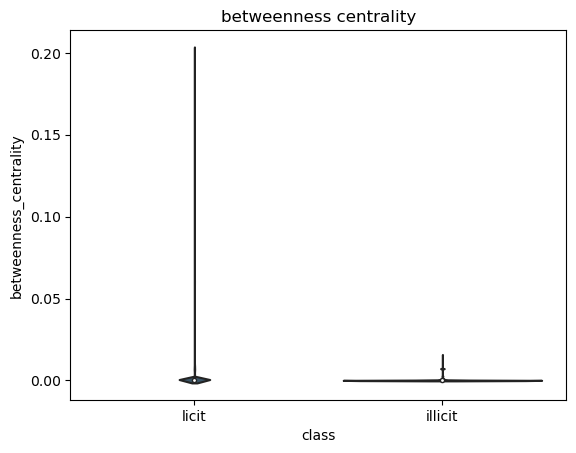

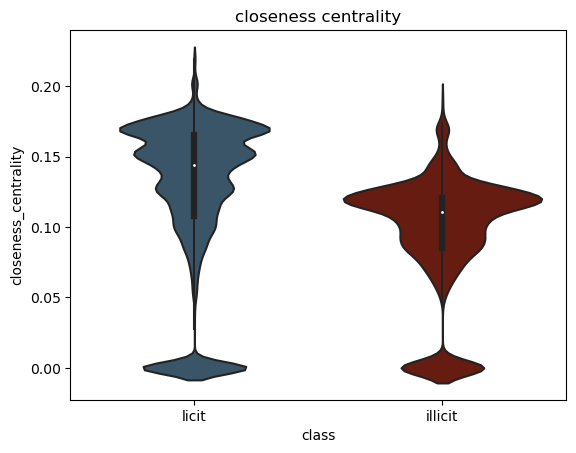

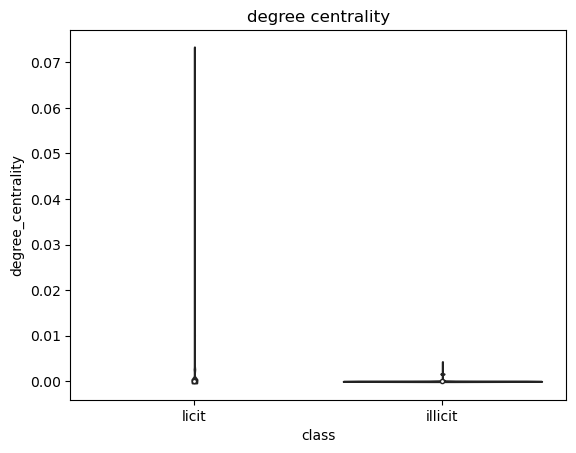

In [94]:
cl

In [33]:
actor = pd.read_csv('new_data/df_actor.csv')
try:
    actor.drop('Unnamed: 0',axis=1,inplace=True)
except:
    pass



,address,Time step,class,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
10,796868,32,1,1.0,1.0,453699.0,453700.0,1.0,2.0,453700.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0
11,796868,32,1,1.0,1.0,453699.0,453700.0,1.0,2.0,453700.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0
22,723229,25,1,1.0,1.0,439584.0,439587.0,3.0,2.0,439587.0,...,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0
23,723229,25,1,1.0,1.0,439584.0,439587.0,3.0,2.0,439587.0,...,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0
73,165378,2,1,1.0,1.0,393216.0,393218.0,2.0,2.0,393218.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367085,24641,26,1,0.0,6.0,405324.0,473866.0,68542.0,6.0,0.0,...,1.0,32244.0,13708.4,10083.0,0.0,11.0,1.0,1.0,1.0,1.0
367086,24641,31,1,0.0,6.0,405324.0,473866.0,68542.0,6.0,0.0,...,1.0,32244.0,13708.4,10083.0,0.0,11.0,1.0,1.0,1.0,1.0
367087,24641,42,1,0.0,6.0,405324.0,473866.0,68542.0,6.0,0.0,...,1.0,32244.0,13708.4,10083.0,0.0,11.0,1.0,1.0,1.0,1.0
367088,24641,42,1,0.0,6.0,405324.0,473866.0,68542.0,6.0,0.0,...,1.0,32244.0,13708.4,10083.0,0.0,11.0,1.0,1.0,1.0,1.0


In [36]:
actor = actor.dropna(axis=1,how='any')
actor['class'].replace(2,0,inplace=True)
df = actor.copy()

In [37]:
actor['count'] = 1

# Visualization


In [38]:
illicit_actor_appear = actor[actor['class']==1].groupby('address').sum()
licit_actor_appear = actor[actor['class']==0].groupby('address').sum()

In [39]:
illicit_actor_appear['count'].max()

421

In [40]:

il_cnt = [];
l_cnt = []
for i in range(1,50):
    il_num = illicit_actor_appear[illicit_actor_appear['count'] == i].shape[0]
    l_num = licit_actor_appear[licit_actor_appear['count'] == i].shape[0]
    
    #print(i,':',new_num)
    # if il_num == 0 and l_cnt = 0:
    #     il_cnt.append(0)
        
    # if l_cnt == 0:        
        
    il_cnt.append(il_num)
    l_cnt.append(l_num)
    
    

In [41]:
a = pd.DataFrame({'licit':l_cnt,'illicit':il_cnt})
a

,licit,illicit
0,207283,4739
1,34166,8670
2,4171,281
3,1843,173
4,1446,66
5,846,60
6,409,55
7,226,48
8,134,37
9,86,22


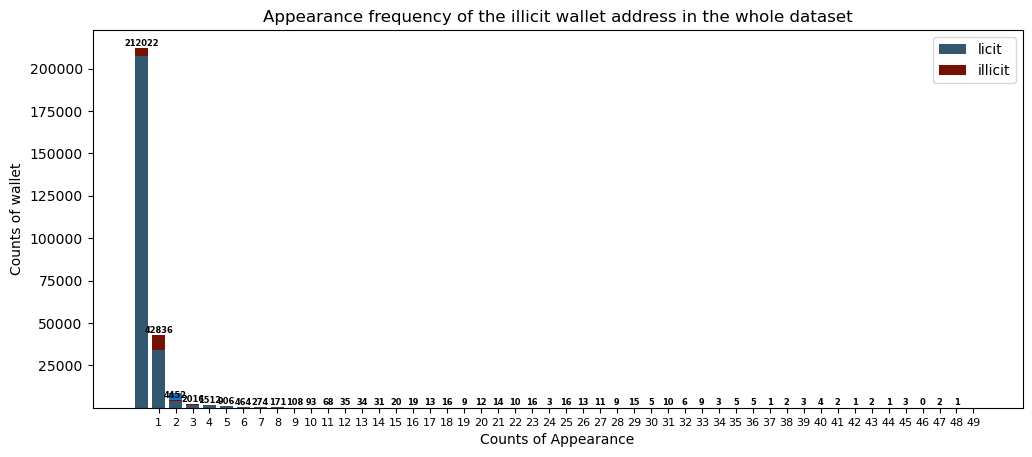

In [66]:

fig, ax = plt.subplots(figsize=(12,5),dpi=100)
plt.bar(np.arange(1,50),il_cnt,)

ax.set_xticks(np.arange(1,50,1))
plt.title('Appearance frequency of the illicit wallet address in the whole dataset')
ax.set_ylabel('Counts of wallet')
ax.set_xlabel('Counts of Appearance')
colors = ['#33576E','#741102',]
bottom = np.zeros(len(a))

for i, col in enumerate(a.columns):
  ax.bar(
      a.index, a[col], bottom=bottom, label=col, color=colors[i])
  bottom += np.array(a[col])

totals = a.sum(axis=1)
y_offset = 1500
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold',size=6)
plt.xticks(fontsize=8)
# Let's put the annotations inside the bars themselves by using a
# negative offset.
# y_offset = -15
# For each patch (basically each rectangle within the bar), add a label.
# for bar in ax.patches:
#   ax.text(
#       # Put the text in the middle of each bar. get_x returns the start
#       # so we add half the width to get to the middle.
#       bar.get_x() + bar.get_width() / 2,
#       # Vertically, add the height of the bar to the start of the bar,
#       # along with the offset.
#       bar.get_height() + bar.get_y() + y_offset,
#       # This is actual value we'll show.
#       round(bar.get_height()),
#       # Center the labels and style them a bit.
#       ha='center',
#       color='w',
#       weight='bold',
#       size=8
#   )
ax.legend()

Text(0.5, 0, 'Counts of Appearance')

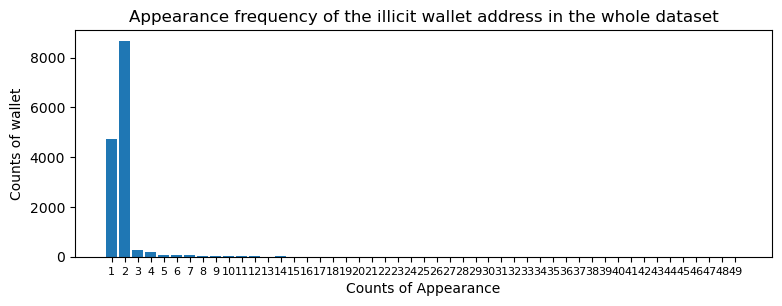

In [70]:
plt.subplots(figsize=(9,3),dpi=100)
plt.bar(np.arange(1,50),il_cnt,)

plt.xticks(np.arange(1,50,1),fontsize=8)
plt.title('Appearance frequency of the illicit wallet address in the whole dataset')
plt.ylabel('Counts of wallet')
plt.xlabel('Counts of Appearance')

In [44]:
actor.columns

Index(['address', 'Time step', 'class', 'num_txs_as_sender',
       'num_txs_as receiver', 'first_block_appeared_in',
       'last_block_appeared_in', 'lifetime_in_blocks', 'total_txs',
       'first_sent_block', 'first_received_block', 'num_timesteps_appeared_in',
       'btc_transacted_total', 'btc_transacted_min', 'btc_transacted_max',
       'btc_transacted_mean', 'btc_transacted_median', 'btc_sent_total',
       'btc_sent_min', 'btc_sent_max', 'btc_sent_mean', 'btc_sent_median',
       'btc_received_total', 'btc_received_min', 'btc_received_max',
       'btc_received_mean', 'btc_received_median', 'fees_total', 'fees_min',
       'fees_max', 'fees_mean', 'fees_median', 'fees_as_share_total',
       'fees_as_share_min', 'fees_as_share_max', 'fees_as_share_mean',
       'fees_as_share_median', 'blocks_btwn_txs_total', 'blocks_btwn_txs_min',
       'blocks_btwn_txs_max', 'blocks_btwn_txs_mean', 'blocks_btwn_txs_median',
       'blocks_btwn_input_txs_total', 'blocks_btwn_input_txs_min'

In [45]:
illicit_data = actor[actor['class']==1].drop_duplicates()
licit_data = actor[actor['class']==0].drop_duplicates()

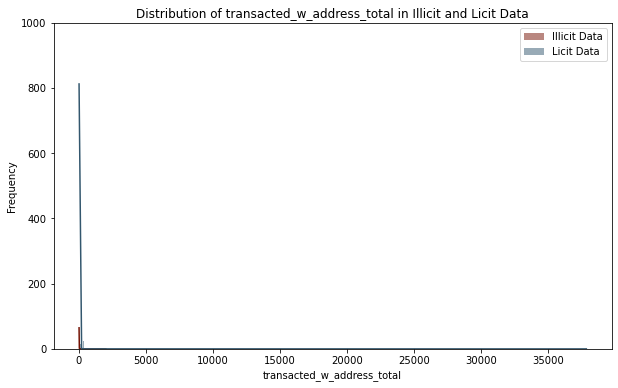

In [72]:
import seaborn as sns

import matplotlib.pyplot as plt



# # Create a box plot
# plt.figure(figsize=(10, 6))
# sns.displot(data=df,hue='class')
# # sns.boxplot(data=[illicit_data['transacted_w_address_total'], licit_data['transacted_w_address_total']], 
# #             labels=['Illicit Data', 'Licit Data'])
# plt.xlabel('Data Type')
# plt.ylabel('transacted_w_address_total')
# plt.title('Distribution of transacted_w_address_total in Illicit and Licit Data')
# plt.show()

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=illicit_data, x='transacted_w_address_total', color=colors[0], label='Illicit Data', kde=True)
sns.histplot(data=licit_data, x='transacted_w_address_total', color=colors[1], label='Licit Data', kde=True)
plt.ylim(0,1000)
plt.xlabel('transacted_w_address_total')
plt.ylabel('Frequency')
plt.title('Distribution of transacted_w_address_total in Illicit and Licit Data')
plt.legend()
plt.show()


# Model


In [47]:


for column in actor.columns[3:]:
    feature = np.array(actor[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    actor[column] = feature_scaled.reshape(1,-1)[0]

In [48]:
X = actor.drop(['class','address','Time step'],axis=1)
y = actor['class']

In [49]:
# prompt: sort mergedf_txs_features  with time step and give me the index range from time step 1-39
sorted_df =  actor.sort_values(by=['Time step'])
index_train = sorted_df[sorted_df['Time step'].between(1, 34)].index.tolist()

train = actor.iloc[index_train]
test =  actor.drop(index=index_train)
print('train shape: ',train.shape[0],'\ntest shape: ',test.shape[0])



y_train = train['class']
X_train = train.drop(['class','address','Time step'],axis=1)
y_test = test['class']
X_test = test.drop(['class','address','Time step'],axis=1)


train shape:  245667 
test shape:  121805


In [50]:
df

,address,Time step,class,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,...,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median,count
0,821233,25,0,0.0,1.0,439586.0,439586.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,24.0,1.0,1.0,1.0,1.0,1
1,154081,21,0,0.0,1.0,431522.0,431522.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1
2,446230,20,0,0.0,1.0,429513.0,429513.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,1
3,544668,5,0,1.0,1.0,399269.0,399271.0,2.0,2.0,399271.0,...,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1
4,544668,5,0,1.0,1.0,399269.0,399271.0,2.0,2.0,399271.0,...,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367467,245202,11,0,0.0,1.0,411364.0,411364.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,1
367468,779316,23,0,0.0,1.0,435555.0,435555.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,1
367469,269631,16,0,0.0,1.0,421443.0,421443.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,9.0,1.0,1.0,1.0,1.0,1
367470,240916,24,0,0.0,1.0,437572.0,437572.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,11.0,1.0,1.0,1.0,1.0,1


In [51]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

In [52]:
X_test

,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,first_received_block,num_timesteps_appeared_in,btc_transacted_total,...,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median,count
20,0.000000,0.007449,0.166799,0.854198,0.687399,0.002041,0.000000,0.834760,0.043478,2.086520e-03,...,0.395837,0.229152,0.291618,0.00014,0.002669,0.0,0.00641,0.00165,0.0,0.0
24,0.000688,0.001862,0.999928,0.999959,0.000031,0.000680,0.999992,0.999986,0.000000,7.554455e-08,...,0.000000,0.000000,0.000000,0.00000,0.002511,0.0,0.00000,0.00000,0.0,0.0
25,0.000688,0.001862,0.999928,0.999959,0.000031,0.000680,0.999992,0.999986,0.000000,7.554455e-08,...,0.000000,0.000000,0.000000,0.00000,0.002511,0.0,0.00000,0.00000,0.0,0.0
26,0.000688,0.000000,0.854208,0.854208,0.000000,0.000000,0.971087,0.000000,0.000000,3.515735e-07,...,0.000000,0.000000,0.000000,0.00000,0.000026,0.0,0.00000,0.00000,0.0,0.0
28,0.000688,0.000000,0.833294,0.833294,0.000000,0.000000,0.966939,0.000000,0.000000,4.588780e-05,...,0.000000,0.000000,0.000000,0.00000,0.000026,0.0,0.00000,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367456,0.000000,0.001862,0.895862,0.895862,0.000000,0.000000,0.000000,0.979347,0.000000,1.727362e-04,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.00000,0.0,0.0
367457,0.000000,0.001862,0.833335,0.833335,0.000000,0.000000,0.000000,0.966947,0.000000,1.262769e-07,...,0.000000,0.000000,0.000000,0.00000,0.000370,0.0,0.00000,0.00000,0.0,0.0
367459,0.000000,0.001862,0.791661,0.791661,0.000000,0.000000,0.000000,0.958682,0.000000,1.281203e-06,...,0.000000,0.000000,0.000000,0.00000,0.000053,0.0,0.00000,0.00000,0.0,0.0
367461,0.000688,0.000000,0.916600,0.916600,0.000000,0.000000,0.983460,0.000000,0.000000,4.933031e-07,...,0.000000,0.000000,0.000000,0.00000,0.000185,0.0,0.00000,0.00000,0.0,0.0


#LR

In [53]:

# LOGISTIC REGRESSION (LR)
cLR = LogisticRegression().fit(X_train.values,y_train.values)
y_preds_LR = cLR.predict(X_test)
acc = accuracy_score(y_test.values, y_preds_LR)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_LR)
fpr, tpr, thersholds = roc_curve(y_test.values, y_preds_LR, pos_label=1)
roc_auc = auc(fpr, tpr)

print("Logistic Regression")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_preds_LR, average='micro')
print('Accuracy:',acc)
print("Micro-Average F1 Score: %.3f"%(micro_f1))
print('auc_roc:%.3f'%roc_auc)

Logistic Regression
Precision: 0.194 
Recall: 0.669 
F1 Score: 0.301
Accuracy: 0.7784984196051066
Micro-Average F1 Score: 0.778
auc_roc:0.728


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# RF

In [54]:
# prompt: build random forest for classifier question between two class(1 and 2) and evaluate the model result with f1, recall,percision

# Train the random forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = clf.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred_rf , average='binary', pos_label=1)
recall = recall_score(y_test, y_pred_rf , average='binary', pos_label=1)
precision = precision_score(y_test, y_pred_rf , average='binary', pos_label=1)
rf_acc= accuracy_score(y_test, y_pred_rf)
fpr, tpr, thersholds = roc_curve(y_test.values, y_pred_rf, pos_label=1)
roc_auc = auc(fpr, tpr)
print('auc_roc:%.3f'%roc_auc)
print("F1 score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print('Accuracy:',rf_acc)



auc_roc:0.613
F1 score: 0.32735391485102777
Recall: 0.2450437989857077
Precision: 0.4929283561326223
Accuracy: 0.9282705964451378


In [55]:
X_train.columns[1]

'num_txs_as receiver'

In [60]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already trained the RandomForestClassifier model and stored it in a variable called 'rf_model'
# Assuming you have already prepared the feature matrix and stored it in a variable called 'X'

# # Fit the RandomForestClassifier model on the feature matrix
# rf_model.fit(X, y)

# Get the feature importances
importances = clf.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Get the top 10 important features
top_10_features = feature_importances_df.head(10)

# Print the top 10 important features
print(top_10_features)



                       Feature  Importance
50  transacted_w_address_total    0.070633
6             first_sent_block    0.063003
26                    fees_max    0.058411
7         first_received_block    0.051990
28                 fees_median    0.047619
25                    fees_min    0.042531
2      first_block_appeared_in    0.041368
27                   fees_mean    0.040864
24                  fees_total    0.039716
31           fees_as_share_max    0.037792


In [63]:
top_10_features

,Feature,Importance
50,transacted_w_address_total,0.070633
6,first_sent_block,0.063003
26,fees_max,0.058411
7,first_received_block,0.051990
28,fees_median,0.047619
25,fees_min,0.042531
2,first_block_appeared_in,0.041368
27,fees_mean,0.040864
24,fees_total,0.039716
31,fees_as_share_max,0.037792


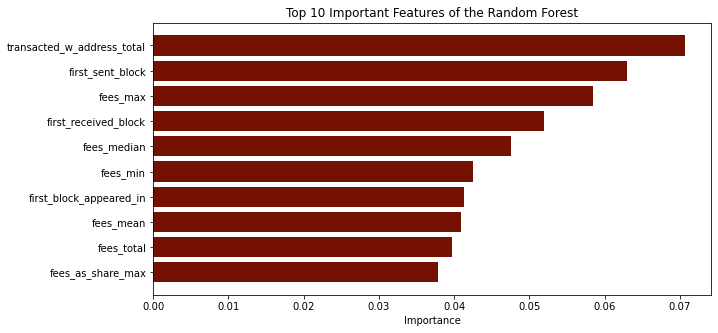

In [69]:
# Assuming top_10_features is a dictionary
features = list(top_10_features.Feature)
importances = list(top_10_features.Importance)
colors = ['#741102','#33576E','#498B6D']
plt.figure(figsize=(10, 5))
plt.barh(features, importances, color=colors[0])
plt.xlabel('Importance')
plt.title('Top 10 Important Features of the Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the feature with the highest importance at the top
plt.show()


In [57]:
X_train.shape[1]

56

In [58]:
X_train.columns[del_list].tolist()

NameError: name 'del_list' is not defined

In [ ]:
selected = actor.drop(actor.columns['last_block_appeared_in',
 'lifetime_in_blocks',
 'btc_received_median',
 'blocks_btwn_output_txs_mean',
 'fees_total',
 'fees_min',
 'fees_median',
 'btc_received_max',
 'btc_received_mean',
 'class'],axis=1)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:




# Drop the 5 least important features
X_train_reduced = np.delete(X_train.values, indices[-10:], axis=1)
X_test_reduced = np.delete(X_test.values, indices[-10:], axis=1)

# Train the random forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=42)
clf.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred_rf = clf.predict(X_test_reduced)

# Evaluate the model
f1 = f1_score(y_test, y_pred_rf , average='binary', pos_label=1)
recall = recall_score(y_test, y_pred_rf , average='binary', pos_label=1)
precision = precision_score(y_test, y_pred_rf , average='binary', pos_label=1)
rf_acc= accuracy_score(y_test, y_pred_rf)
fpr, tpr, thersholds = roc_curve(y_test.values, y_pred_rf, pos_label=1)
roc_auc = auc(fpr, tpr)

print('auc_roc:%.3f'%roc_auc)
print("F1 score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print('Accuracy:',rf_acc)


NameError: name 'indices' is not defined

# XG

In [ ]:
!pip install xgboost

In [ ]:
X_test

,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,first_received_block,num_timesteps_appeared_in,btc_transacted_total,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
20,0.000000,0.007449,0.166799,0.854198,0.687399,0.002041,0.000000,0.834760,0.043478,2.086520e-03,...,0.0,0.395837,0.229152,0.291618,0.00014,0.002669,0.0,0.00641,0.00165,0.0
24,0.000688,0.001862,0.999928,0.999959,0.000031,0.000680,0.999992,0.999986,0.000000,7.554455e-08,...,0.0,0.000000,0.000000,0.000000,0.00000,0.002511,0.0,0.00000,0.00000,0.0
25,0.000688,0.001862,0.999928,0.999959,0.000031,0.000680,0.999992,0.999986,0.000000,7.554455e-08,...,0.0,0.000000,0.000000,0.000000,0.00000,0.002511,0.0,0.00000,0.00000,0.0
26,0.000688,0.000000,0.854208,0.854208,0.000000,0.000000,0.971087,0.000000,0.000000,3.515735e-07,...,0.0,0.000000,0.000000,0.000000,0.00000,0.000026,0.0,0.00000,0.00000,0.0
28,0.000688,0.000000,0.833294,0.833294,0.000000,0.000000,0.966939,0.000000,0.000000,4.588780e-05,...,0.0,0.000000,0.000000,0.000000,0.00000,0.000026,0.0,0.00000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367456,0.000000,0.001862,0.895862,0.895862,0.000000,0.000000,0.000000,0.979347,0.000000,1.727362e-04,...,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.00000,0.0
367457,0.000000,0.001862,0.833335,0.833335,0.000000,0.000000,0.000000,0.966947,0.000000,1.262769e-07,...,0.0,0.000000,0.000000,0.000000,0.00000,0.000370,0.0,0.00000,0.00000,0.0
367459,0.000000,0.001862,0.791661,0.791661,0.000000,0.000000,0.000000,0.958682,0.000000,1.281203e-06,...,0.0,0.000000,0.000000,0.000000,0.00000,0.000053,0.0,0.00000,0.00000,0.0
367461,0.000688,0.000000,0.916600,0.916600,0.000000,0.000000,0.983460,0.000000,0.000000,4.933031e-07,...,0.0,0.000000,0.000000,0.000000,0.00000,0.000185,0.0,0.00000,0.00000,0.0


In [ ]:
from xgboost import XGBClassifier
# Build XGBClassifier model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
# f1_xgb = f1_score(y_test, y_pred_xgb, average='binary', pos_label=1)
# recall_xgb = recall_score(y_test, y_pred_xgb, average='binary', pos_label=1)
# precision_xgb = precision_score(y_test, y_pred_xgb, average='binary', pos_label=1)
# acc_xgb = accuracy_score(y_test, y_pred_xgb)

acc = accuracy_score(y_test.values, y_pred_xgb)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_pred_xgb)
fpr, tpr, thersholds = roc_curve(y_test.values, y_pred_xgb, pos_label=1)
roc_auc = auc(fpr, tpr)

print('auc_roc:%.3f'%roc_auc)
print("XGB")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_pred_xgb, average='micro')
print('Accuracy:',acc)
print("Micro-Average F1 Score: %.3f"%(micro_f1))


auc_roc:0.730
XGB
Precision: 0.493 
Recall: 0.499 
F1 Score: 0.496
Accuracy: 0.927745166454579
Micro-Average F1 Score: 0.928


In [ ]:
# prompt: build svm binary classification problem and evaluate f1, acc, recall and percision

from sklearn import svm


clf = svm.SVC(kernel='rbf', gamma='scale', decision_function_shape='ovo')

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred_svm = clf.predict(X_test)

# Evaluate the performance of the classifier
f1 = f1_score(y_test, y_pred_svm, average='binary', pos_label=1)
recall = recall_score(y_test, y_pred_svm, average='binary', pos_label=1)
precision = precision_score(y_test, y_pred_svm, average='binary', pos_label=1)
acc = accuracy_score(y_test, y_pred_svm)

# Print the performance metrics
print(f'Accuracy: {acc :.4f}')
print(f'Recall: {recall :.4f}')
print(f'F1: {f1 :.4f}')
print(f'Precision: {precision :.4f}')
fpr, tpr, thersholds = roc_curve(y_test.values, y_pred_svm, pos_label=1)
roc_auc = auc(fpr, tpr)

print('auc_roc:%.3f'%roc_auc)

# def drawROC(test_y,y_pred):
#     fpr, tpr, thersholds = roc_curve(test_y,y_pred, pos_label=1)
#     roc_auc = auc(fpr, tpr)
 
#     plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
    
#     plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
#     plt.ylim([-0.05, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')  
#     plt.title('ROC Curve')
#     plt.legend(loc="lower right")
#     plt.show()
    
    
# Draw ROC curve
# drawROC(y_test, y_pred_svm)



Accuracy: 0.9042
Recall: 0.2938
F1: 0.3041
Precision: 0.3152
auc_roc:0.622


# data visualizaiton

In [ ]:
illicit_data = df[df['class']==1]
licit_data = df[df['class']==0]

In [ ]:
'first_sent_block', 'first_received_block'

('first_sent_block', 'first_received_block')

In [ ]:
my_palette

['#741102', '#33576E', '#498B6D']

In [ ]:
# actor.columns
col = [
'fees_total',
'fees_as_share_total',
'blocks_btwn_input_txs_total',
'btc_sent_total',
'btc_received_total',
'total_txs',
'btc_transacted_total',
'transacted_w_address_total',
'blocks_btwn_input_txs_total','blocks_btwn_output_txs_total']

fees_total


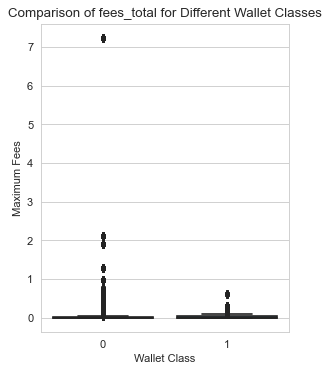

fees_as_share_total


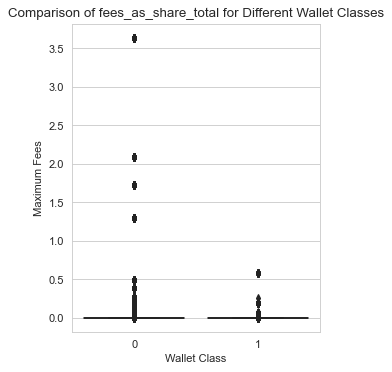

blocks_btwn_input_txs_total


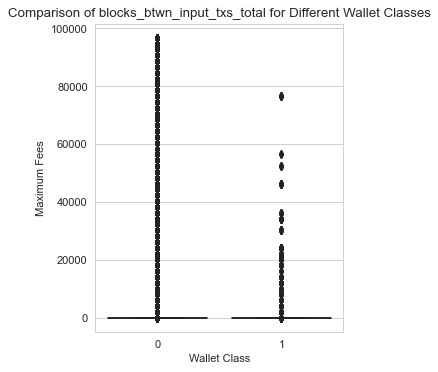

btc_sent_total


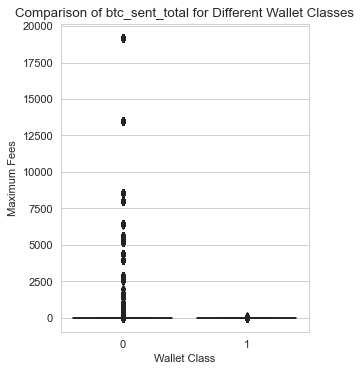

btc_received_total


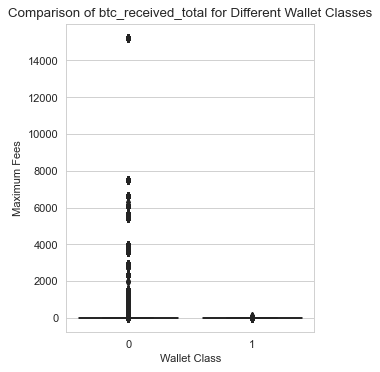

total_txs


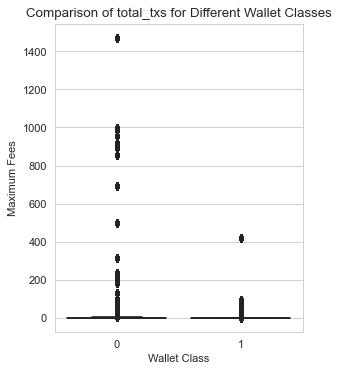

btc_transacted_total


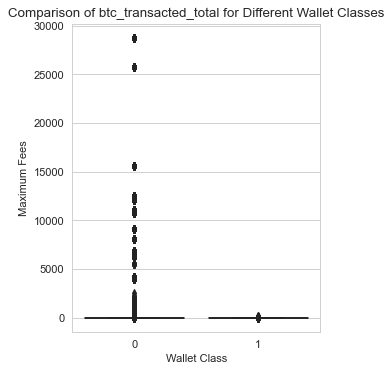

transacted_w_address_total


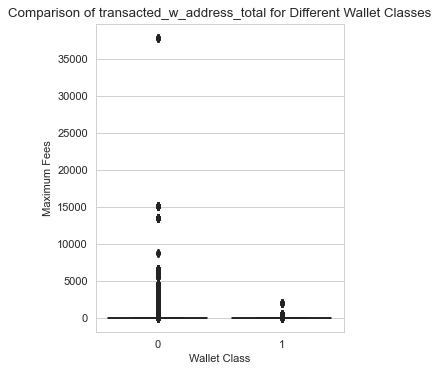

blocks_btwn_input_txs_total


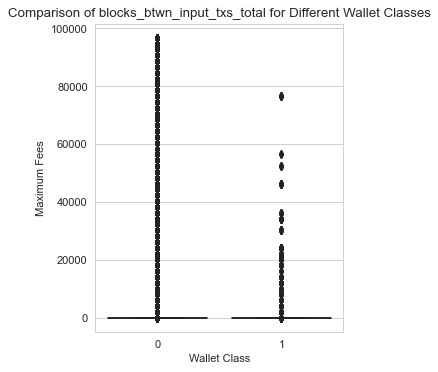

blocks_btwn_output_txs_total


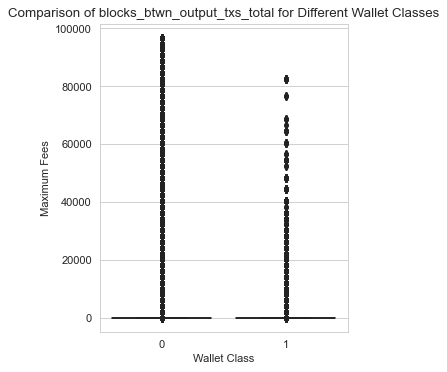

In [ ]:
sns.set_style("whitegrid")
for column in col:
    print(column)
    plt.subplots(figsize=(4,5),dpi=80)
    sns.boxplot(data=df, x="class", y= column)
    plt.xlabel('Wallet Class')
    plt.ylabel('Maximum Fees')
    plt.title('Comparison of %s for Different Wallet Classes'%column)
    plt.show()

In [ ]:
actor.columns

Index(['address', 'Time step', 'class', 'num_txs_as_sender',
       'num_txs_as receiver', 'first_block_appeared_in',
       'last_block_appeared_in', 'lifetime_in_blocks', 'total_txs',
       'first_sent_block', 'first_received_block', 'num_timesteps_appeared_in',
       'btc_transacted_total', 'btc_transacted_min', 'btc_transacted_max',
       'btc_transacted_mean', 'btc_transacted_median', 'btc_sent_total',
       'btc_sent_min', 'btc_sent_max', 'btc_sent_mean', 'btc_sent_median',
       'btc_received_total', 'btc_received_min', 'btc_received_max',
       'btc_received_mean', 'btc_received_median', 'fees_total', 'fees_min',
       'fees_max', 'fees_mean', 'fees_median', 'fees_as_share_total',
       'fees_as_share_min', 'fees_as_share_max', 'fees_as_share_mean',
       'fees_as_share_median', 'blocks_btwn_txs_total', 'blocks_btwn_txs_min',
       'blocks_btwn_txs_max', 'blocks_btwn_txs_mean', 'blocks_btwn_txs_median',
       'blocks_btwn_input_txs_total', 'blocks_btwn_input_txs_min'

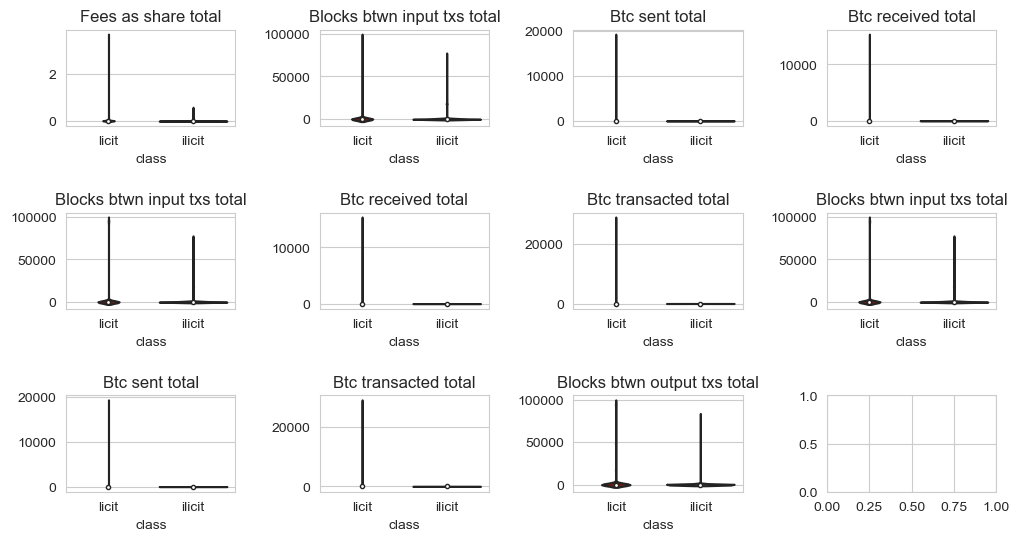

In [ ]:

# Set up the figure and axis
fig, axs = plt.subplots(3, 4,figsize=(12,6),dpi=100)

for i in range(3):
    for j in range(4):
        if i == 2 and j ==3:
            continue
        min_y = df[col[(i+1)*(j+1)]].min()
        max_y = df[col[(i+1)*(j+1)]].max()
        sns.violinplot(data=df,x='class',y=col[(i+1)*(j+1)],palette=my_palette,ax= axs[i,j])
        axs[i,j].set(xticks=[0,1], xticklabels=['licit', 'ilicit'],title=col[(i+1)*(j+1)].replace("_"," ").capitalize(),ylabel='');
        # axs[i,j].set_xtick([0,1])
                
        # axs[i,j].set_xticklabel(['licit', 'ilicit'])

        # axs[i,j].set_title()

# for title, ax in axs.items():
#     if title == 'signal':
#         continue

#     ax.set_title(title)
#     ax.sharex(axs['zero padding'])
#     ax.sharey(axs['zero padding'])
# Set the color of the median lines
# plots['cmedians'].set_prop_cycle(my_palette)

# Set the labels

plt.subplots_adjust(wspace =0.5, hspace =0.9)#调整子图间距

plt.show()

In [ ]:
# prompt: get top 10 important feature for rf

importances = clf.feature_importances_
features_names = X_train.columns

# Sort importances and select top 10 features
top_10_indices = np.argsort(importances)[-10:]
top_10_features = [features_names[i] for i in top_10_indices]

# Print top 10 features
print("Top 10 Important Features for Random Forest:")
for feature in top_10_features:
  print(feature)


NameError: name 'clf' is not defined

In [ ]:
illicit_data['transacted_w_address_total'].describe()

count    28601.000000
mean        15.283696
std         76.817472
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1999.000000
Name: transacted_w_address_total, dtype: float64

In [ ]:
licit_data['transacted_w_address_total'].describe()

count    338871.000000
mean        123.802400
std         816.463474
min           1.000000
25%           2.000000
50%           4.000000
75%          10.000000
max       37841.000000
Name: transacted_w_address_total, dtype: float64

In [ ]:
len(licit_data['first_received_block'].unique())

473

In [ ]:
len(illicit_data['first_received_block'].unique())

417

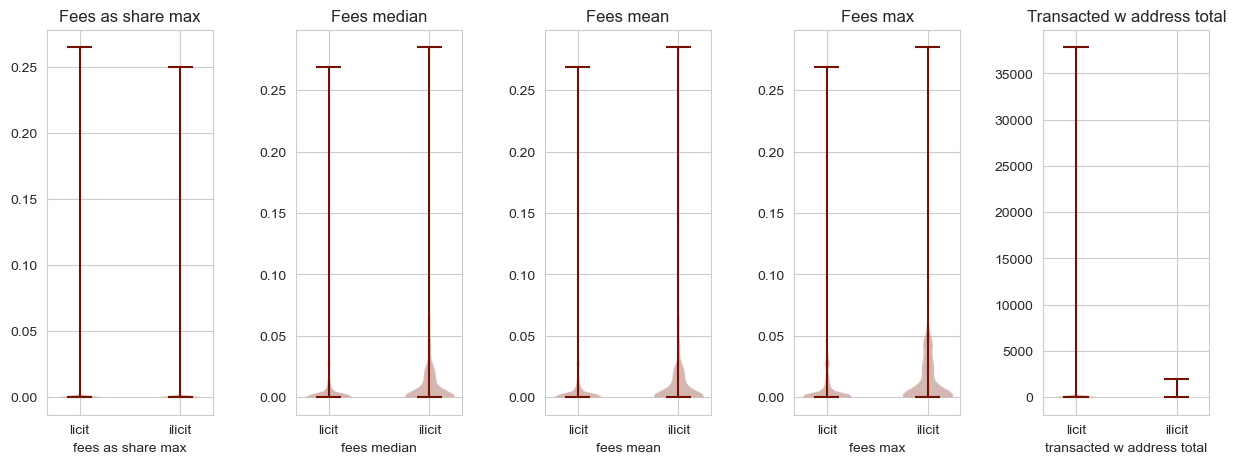

In [ ]:
# prompt: i want to draw violin graph class 1 and class 0 for some features



# Select the features you want to plot
selected_features_to_plot = ['fees_as_share_max',
'fees_median',
'fees_mean',
'fees_max','transacted_w_address_total']

# Create the violin plot
fig, axs = plt.subplots(1, len(selected_features_to_plot), figsize=(15, 5))
for i, feature in enumerate(selected_features_to_plot):
  axs[i].violinplot([df[feature][df["class"] == 0],df[feature][df["class"] == 1]],[0,1])#label="Class 0"
  #axs[i].violinplot(, )#label="Class 1"
  axs[i].set_xlabel(feature.replace('_'," "))
  axs[i].set_ylabel("Value")
  axs[i].set(xticks=[0,1], xticklabels=['licit', 'ilicit'],title=selected_features_to_plot[i].replace("_"," ").capitalize(),ylabel='');
  #axs[i].legend()

plt.subplots_adjust(wspace =0.5, hspace =0.2)#调整子图间距
plt.show()


In [ ]:
# matplotlib.style.available

NameError: name 'illicit_data' is not defined

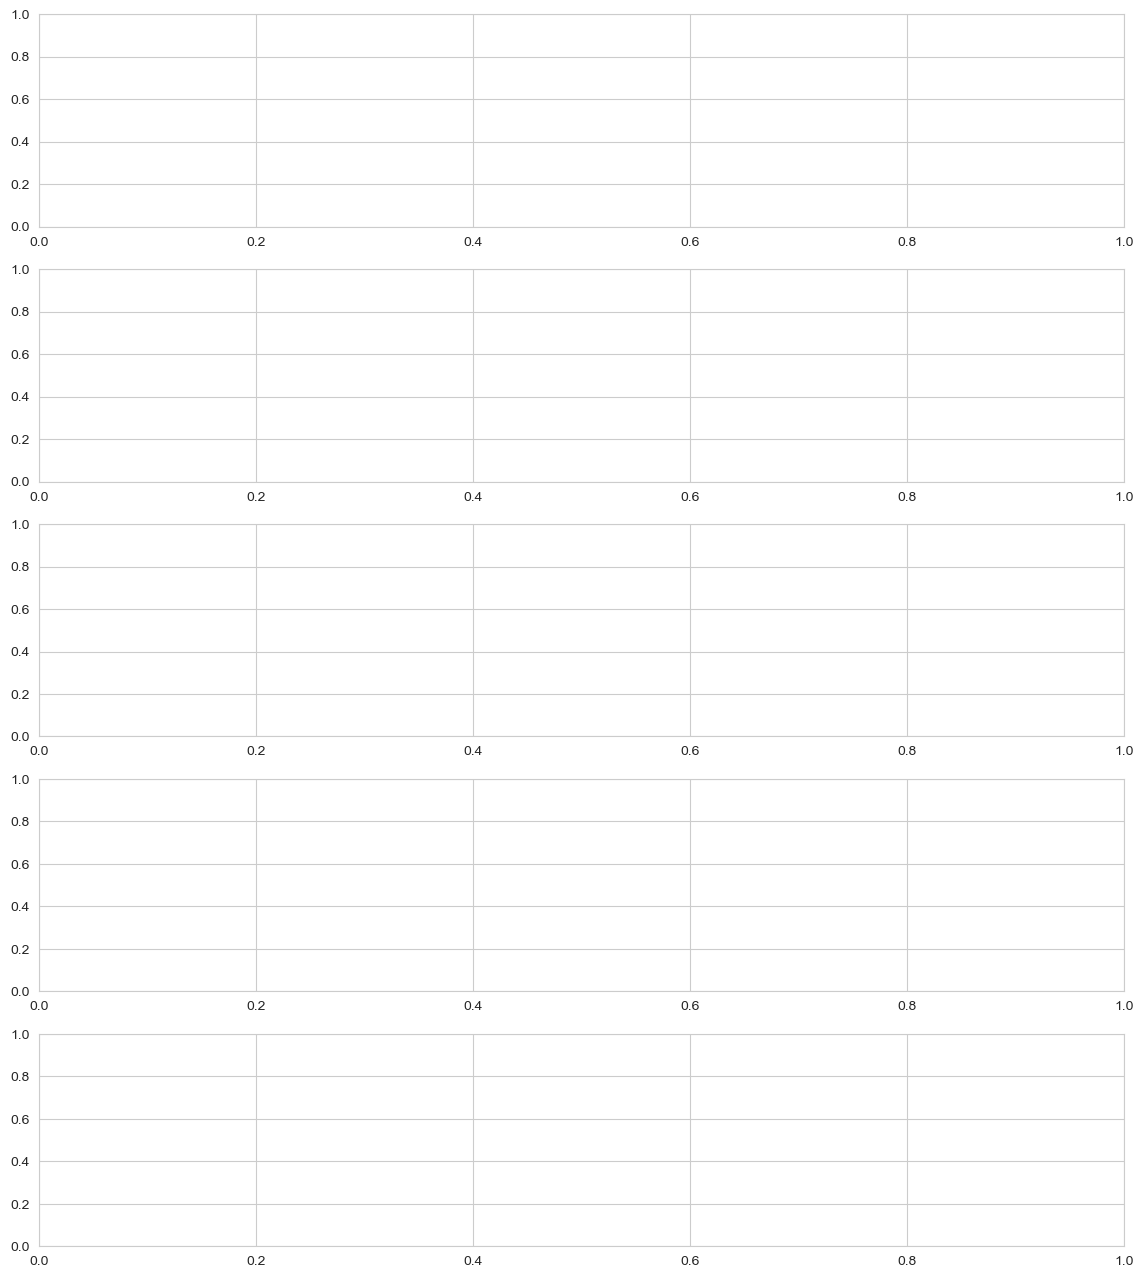

In [ ]:
# colors = {'illicit':'#741102', 'licit':'#33576E','unknown':'#498B6D'}
# labels = ['illicit', 'licit', 'unknown']
#plt.xkcd()
# Define the color palette


# prompt: i got a dataframe with 49 timestep and a feature called 'fees_as_share_max', i would like to group data with every time step and draw a plot to show the differences between this feature,
fig, axs = plt.subplots(5, 1, figsize=(14, 16),dpi=100)

features=['fees_min',
 'fees_total',
 'fees_as_share_max',
 'fees_median',
 'fees_mean']
# Create a line plot
for i in range(5):
    feature = features[i]
    # Group the data by timestep
    grouped_data = illicit_data.groupby('Time step')[feature].mean().reset_index()
    axs[i].plot(grouped_data['Time step'], grouped_data[feature],marker='o',label='illicit')
    # Group the data by timestep
    grouped_data = licit_data.groupby('Time step')[feature].mean().reset_index()

    # Create a line plot
    axs[i].plot(grouped_data['Time step'], grouped_data[feature],marker='o',label='licit')

    # Set labels and title
    axs[i].set_xlabel('Timestep')
    axs[i].set_ylabel('%s'%feature)
    axs[i].set_xticks(np.arange(0,50,1))
    axs[i].set_title('%s by Timestep'%(feature.replace('_'," ").capitalize()))
    axs[i].legend()
   


plt.subplots_adjust(wspace =0.2, hspace =0.5)#调整子图间距
# Show the plot
plt.show()

In [ ]:
plt.rcParams['axes.linewidth'] = 1  # 图框宽度
plt.rcParams['figure.dpi'] = 300  # plt.show显示分辨率
font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal',
        'size': 14}
plt.rc('font', **font)


In [ ]:
import matplotlib    
print(matplotlib.matplotlib_fname())

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc
